# Выборочные ACF и PACF (пакет [`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.api import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

Загрузим из БД [`FRED`](https://fred.stlouisfed.org/) недельные данные по Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity (Symbol [`WGS10YR`](https://fred.stlouisfed.org/series/WGS10YR)) с 2000-01-01 по 2023-12-31 и создадим датафрейм `y`

In [2]:
y = web.DataReader(name='WGS10YR', data_source='fred', start='2000-01-01', end='2023-12-31')

## Выборочные ACF & PACF

вычислим (с округление) до лага 7 

In [3]:
acf(y, nlags=7).round(3)

array([1.   , 0.994, 0.987, 0.98 , 0.972, 0.964, 0.956, 0.949])

In [4]:
pacf(y, nlags=7).round(3)

array([ 1.   ,  0.995, -0.162, -0.038, -0.022,  0.   ,  0.016,  0.002])

визуализация ACF

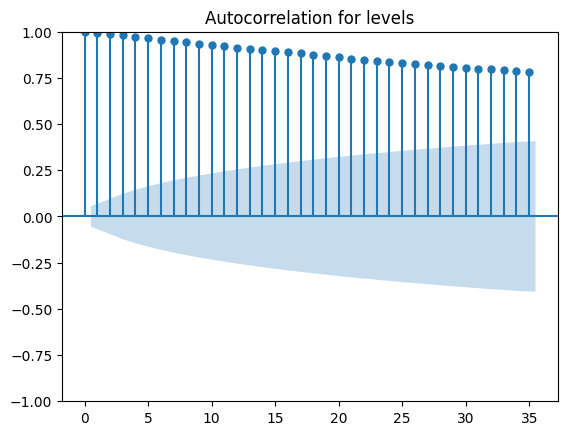

In [5]:
plot_acf(y, lags=35, alpha=0.05, title='Autocorrelation for levels')

plt.show()

визуализация PACF

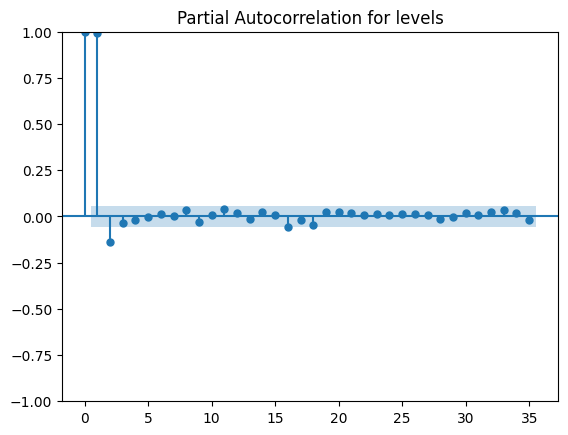

In [6]:
plot_pacf(y, lags=35, alpha=0.05, title='Partial Autocorrelation for levels')

plt.show()

Объединим два графика в один

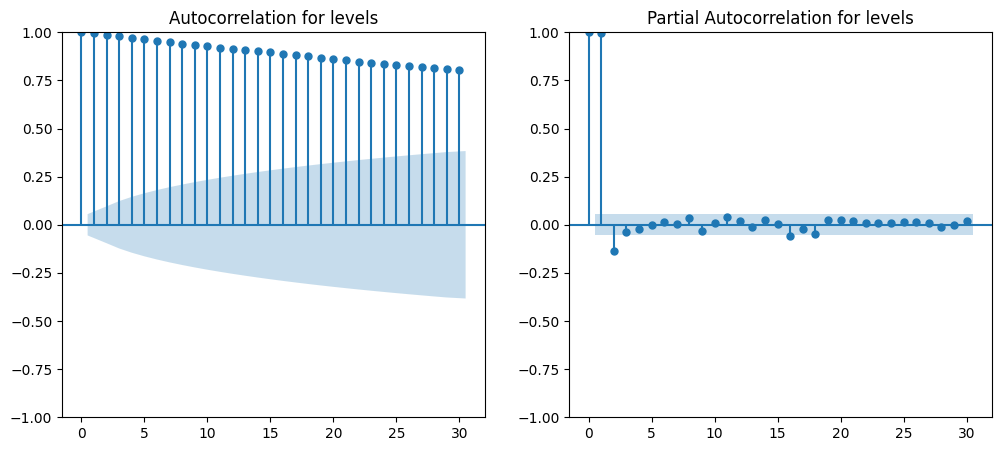

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plot_acf(y, ax=axs[0], lags=30, alpha=0.05, title='Autocorrelation for levels')

plot_pacf(y, ax=axs[1], lags=30, alpha=0.05, title='Partial Autocorrelation for levels')

plt.show()

## Использование ACF и PACF для проверки стационарности ряда

Для стационарного ряда коэффициенты ACF & PACF должны "быстро" убывать к нулю

Сравним поведение ACF & PACF для
* уровней ряда
* первой разности

Создадим ряд и первых разностей и удали пропущенные наблюдения

In [8]:
dy = y.diff().dropna()

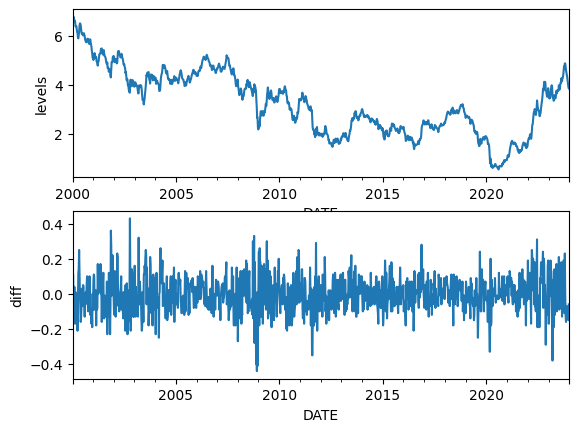

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=1)

y.plot(ax=axs[0])
dy.plot(ax=axs[1])

axs[0].legend().remove()
axs[1].legend().remove()

axs[0].set_ylabel('levels')
axs[1].set_ylabel('diff')

plt.show()

Нарисуем ACF & PACF для каждого ряда и соберём в один график

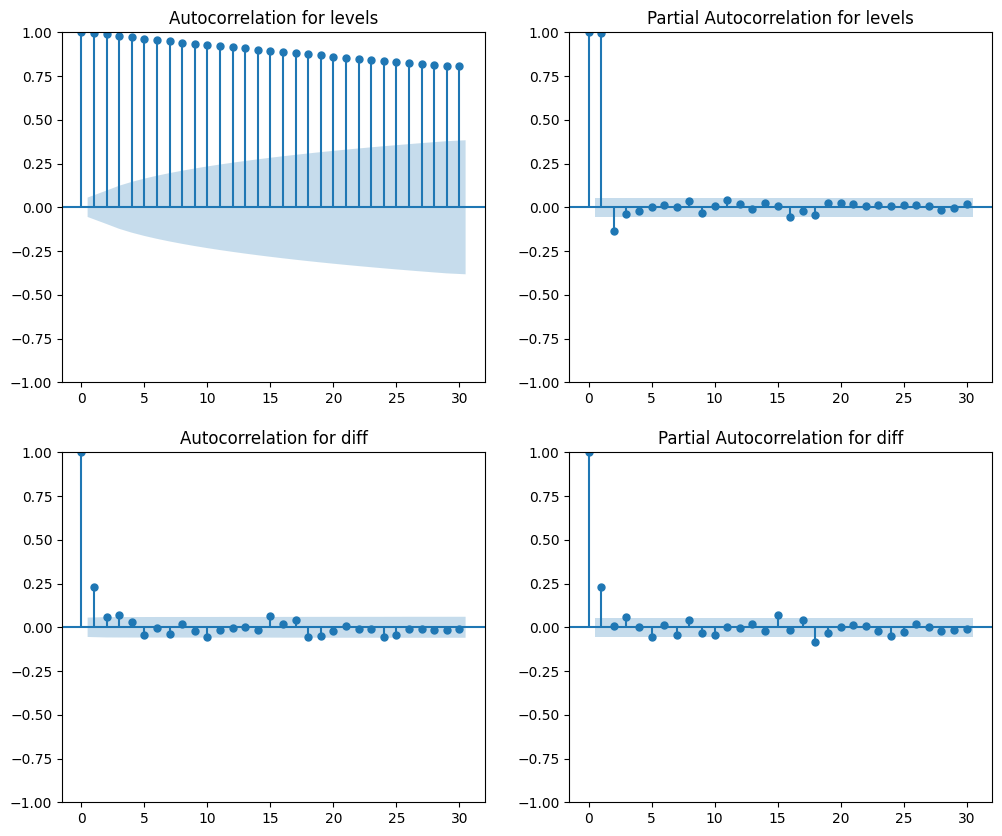

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

plot_acf(y, ax=axs[0,0], lags=30, alpha=0.05, title='Autocorrelation for levels')
plot_pacf(y, ax=axs[0, 1], lags=30, alpha=0.05, title='Partial Autocorrelation for levels')

plot_acf(dy, ax=axs[1,0], lags=30, alpha=0.05, title='Autocorrelation for diff')
plot_pacf(dy, ax=axs[1, 1], lags=30, alpha=0.05, title='Partial Autocorrelation for diff')

plt.show()